In [1]:
from src.data_utils.PP_data import create_PP_dataloader
from src.train_utils.pp_planner import load_from_ptl_checkpoint
from src.module.encoder import UnetD
from torchvision.models import vit_b_16
import matplotlib.pyplot as plt
import torch.nn as nn

dataloader = create_PP_dataloader(r"planning-datasets/data/mpd/forest_032_moore_c8.npz", "valid", 4, shuffle=False, expansion_width=5)
model = UnetD(input_dim=2, encoder_depth=4)
# model = vit_b_16()
# model.conv_proj = nn.Conv2d(2, 768, kernel_size=(16, 16), stride=(16, 16))
# model.heads = nn.Sequential(nn.Linear(model.heads[0].in_features, 224 * 224), nn.Sigmoid(),)
model.load_state_dict(load_from_ptl_checkpoint(r"D:\Paper\ainavigation\model\pp_data\lightning_logs\version_6"))

d:\Application\miniconda3\envs\pytorch\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Number of Validation Samples: 100
	Size: 32x32
load D:\Paper\ainavigation\model\pp_data\lightning_logs\version_6\checkpoints\epoch=272-step=27300.ckpt


<All keys matched successfully>

tensor(False)


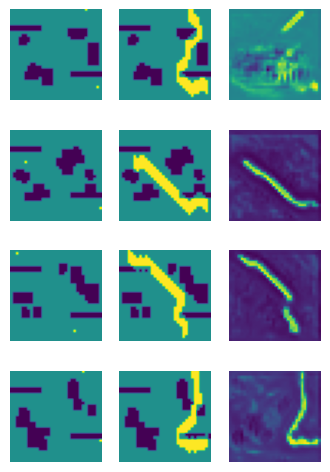

In [9]:

import torch
import torch.nn as nn
import torchvision.transforms as transforms
map_designs, start_maps, goal_maps, expansion_trajs = next(iter(dataloader))
inputs = torch.cat((map_designs, start_maps + goal_maps), dim=1)
output = model(inputs)

fig, axes = plt.subplots(4, 3, figsize=[4, 6])
for i in range(4):
    axes[i][0].imshow((map_designs + start_maps + goal_maps)[i][0])
    axes[i][0].axis("off")
    axes[i][1].imshow((map_designs + expansion_trajs)[i][0])
    axes[i][1].axis("off")
    axes[i][2].imshow((output.detach().cpu().numpy())[i][0])
    axes[i][2].axis("off")
print(torch.all(output[0] == output[3]))